In [44]:
from fastai.vision.all import *
from pathlib import Path

In [45]:
path = Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data')

In [46]:
((path/'train_images').ls())[1]

Path('C:/Users/alika/Desktop/Deep learning/Projects/coke-vs-pepsi-classifier/data/train_images/new_cola (10).jpg.jpg')

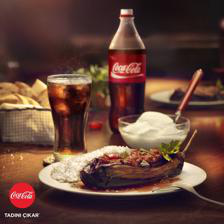

In [47]:
Image.open(((path/'train_images').ls())[10])

# Create dataloader

### We use regex to find photo's label

In [48]:
text = "new_cola (10).jpg"
re.findall(r'_(\w+)\s*\(', text)


['cola']

In [49]:
data_block = DataBlock(
                        blocks=(ImageBlock, CategoryBlock),

                        # We only use the train folder to create the dataset
                        get_items=get_image_files,

                        # We randomly split the train folder into two parts: training and validation
                        splitter=RandomSplitter(valid_pct=0.2, seed=42),

                        # We get the label from the file name
                        get_y=using_attr(RegexLabeller(r'_(\w+)\s*\('), 'name'),

                        item_tfms=Resize(460),
                        batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# we use summery to find error in dataloader
data_block.summary(path/'train_images')

Setting-up type transforms pipelines
Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}


Building one sample
  Pipeline: PILBase.create
    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

    starting from
      C:\Users\alika\Desktop\Deep learning\Projects\coke-vs-pepsi-classifier\data\train_images\new_cola (99).jpg.jpg
    applying partial gives
      cola
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
 gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 470 items
2 datasets of sizes 376,94
Setting up Pipeline: PILBase.create
Setting up Pipeline: part

In [50]:
#Give train dataset to dataloder
dls = data_block.dataloaders(path/'train_images')

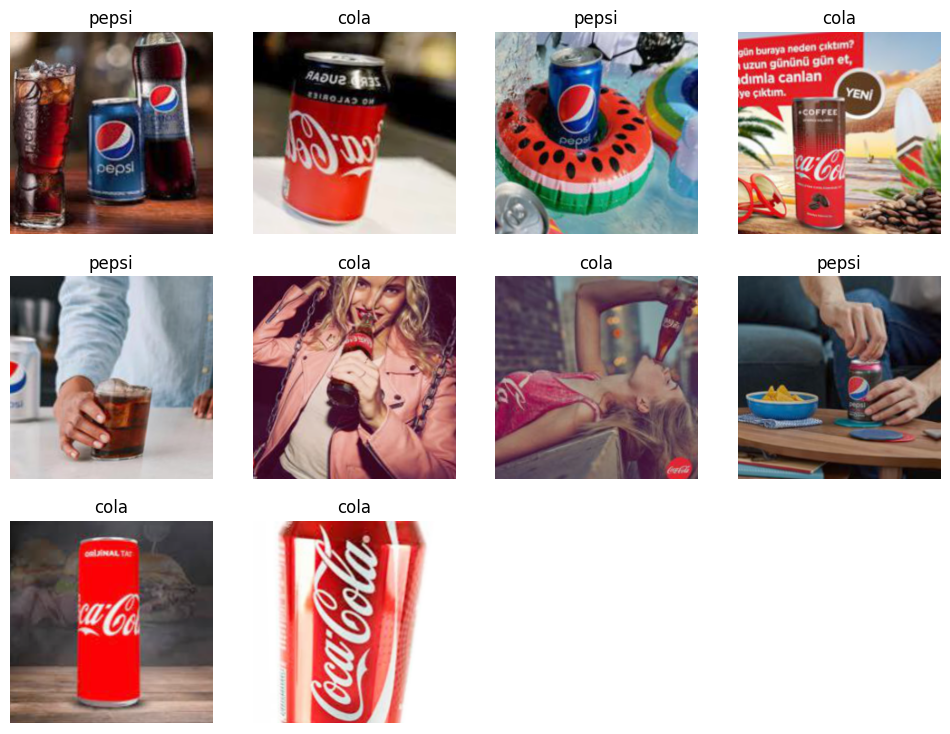

In [51]:
#check some photo's label
dls.show_batch(max_n = 10, nrows = 3)

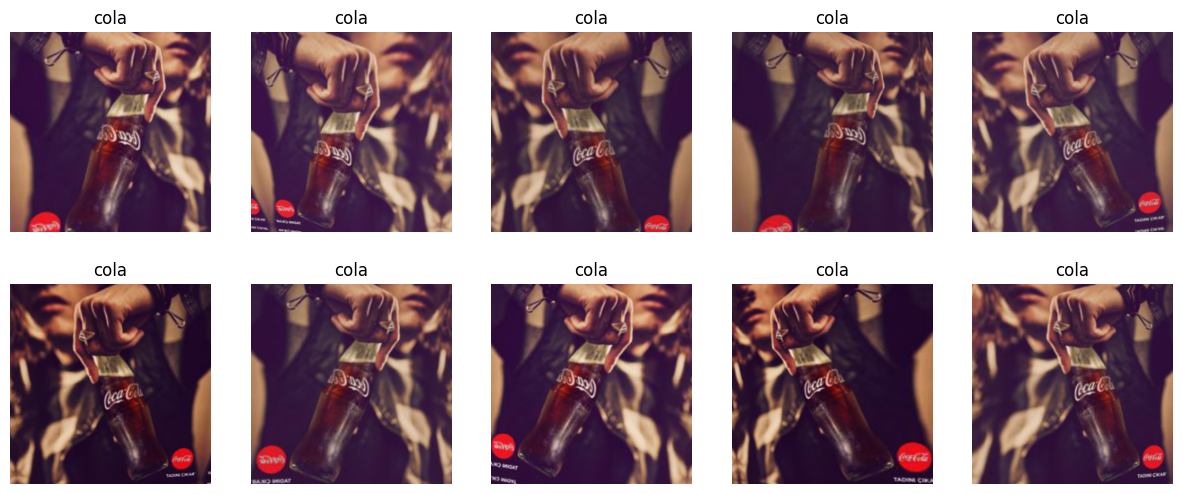

In [52]:
#Here, we used unique=True to have the same image repeated with different versions of this RandomResizedCrop transform.
dls.train.show_batch(max_n = 10, nrows = 2, unique = True)

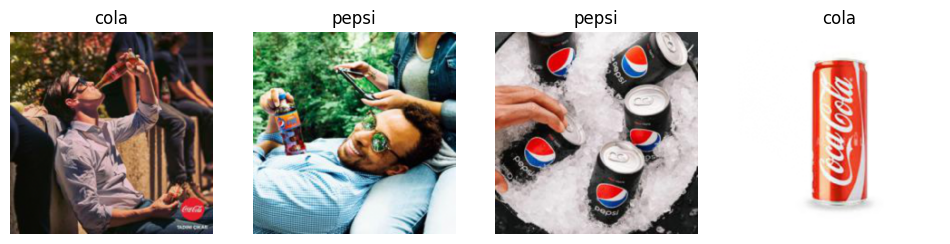

In [53]:
#Show some validation data
dls.valid.show_batch(max_n=4, nrows=1)

# Create Learner

### We use resnet34 as our transformer model

In [54]:
learner = vision_learner(dls , resnet34, metrics = error_rate)

In [55]:
x,y = dls.one_batch()

In [56]:
y

TensorCategory([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
                0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
                0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
                1])

In [15]:
preds = learner.get_preds(dl = [(x,y)])
preds[0]

tensor([[7.9538e-01, 2.0462e-01],
        [8.2890e-01, 1.7110e-01],
        [7.6382e-01, 2.3618e-01],
        [1.7451e-01, 8.2549e-01],
        [7.9439e-01, 2.0561e-01],
        [9.3192e-01, 6.8083e-02],
        [1.6284e-02, 9.8372e-01],
        [2.4714e-01, 7.5286e-01],
        [7.9762e-01, 2.0238e-01],
        [9.8454e-01, 1.5464e-02],
        [9.9724e-01, 2.7586e-03],
        [9.6749e-01, 3.2514e-02],
        [9.8127e-01, 1.8734e-02],
        [1.4131e-01, 8.5869e-01],
        [9.9713e-01, 2.8730e-03],
        [6.0109e-01, 3.9891e-01],
        [6.1401e-02, 9.3860e-01],
        [5.3977e-03, 9.9460e-01],
        [9.9678e-01, 3.2181e-03],
        [3.2369e-01, 6.7631e-01],
        [5.1247e-01, 4.8753e-01],
        [9.0215e-01, 9.7847e-02],
        [1.2001e-02, 9.8800e-01],
        [1.0076e-01, 8.9924e-01],
        [1.0000e+00, 7.8925e-07],
        [1.2067e-01, 8.7933e-01],
        [9.3897e-01, 6.1027e-02],
        [7.5831e-01, 2.4169e-01],
        [9.9975e-01, 2.4504e-04],
        [9.057

# Improving Our Model

### Find Optimom learning rate

fining best learning rate..


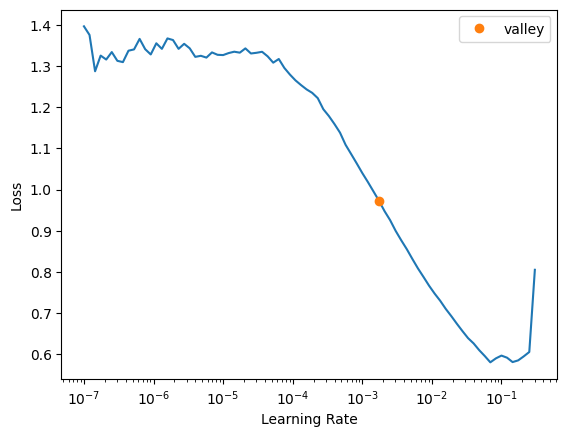

In [57]:
print("fining best learning rate..")
suggested_lrs = learner.lr_find()

# Fine Tune

In [29]:
learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.042054,0.298549,0.095745,00:38


epoch,train_loss,valid_loss,error_rate,time
0,0.210380,0.268349,0.063830,00:48
1,0.209878,0.231703,0.053191,00:50
2,0.149081,0.077753,0.010638,00:50
3,0.111590,0.077736,0.021277,00:50


### Model performance

-- plot confusion matrix ----



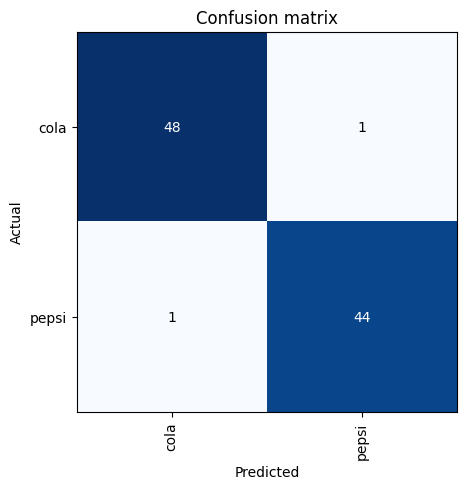

In [33]:
Intrep = ClassificationInterpretation.from_learner(learner)
print('-- plot confusion matrix ----\n')
Intrep.plot_confusion_matrix()

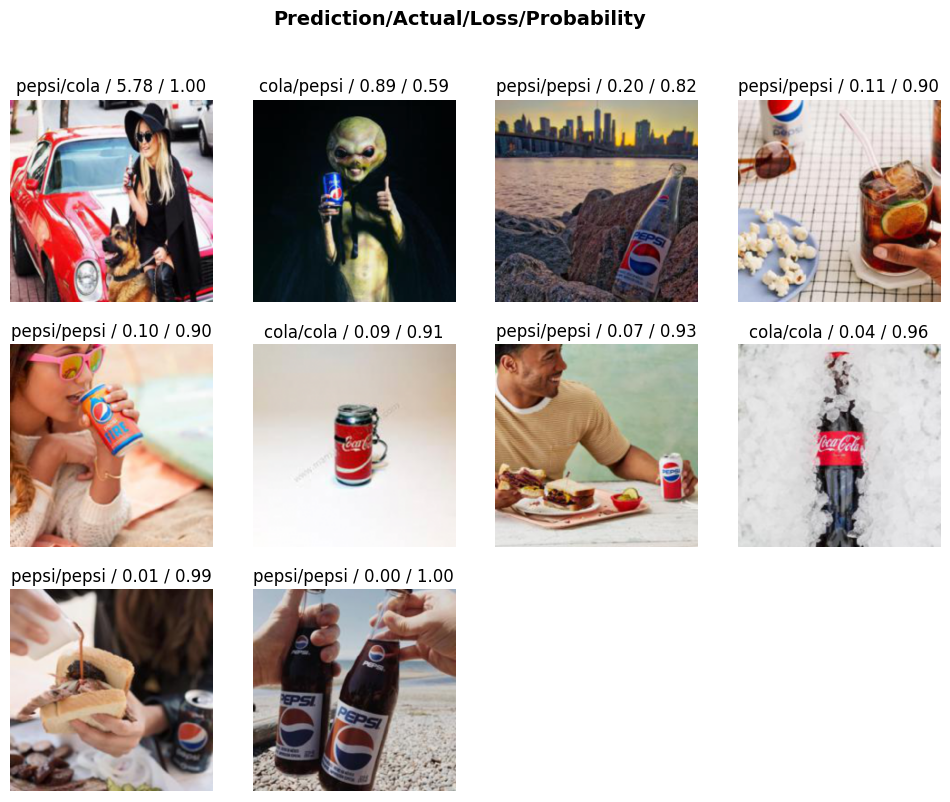

In [34]:
Intrep.plot_top_losses(10)

# Clean our dataset

In [35]:
from fastai.vision.widgets import ImageClassifierCleaner

# here we can delete or relabel our image in train and validation data
cleaner = ImageClassifierCleaner(learner)
cleaner

In [36]:
#remove data from our dataset
for idx,cat in cleaner.change() : shutil.move(str(cleaner.fns[idx]), path/cat)

In [37]:
#change photo's label in our data
for idx in cleaner.delete() :cleaner.fns[idx].unlink()

### We need to create dataloader and learner again.

In [38]:
cleaned_dls = data_block.dataloaders((path/'train_images'))

In [39]:
cleaned_learner = vision_learner(cleaned_dls , resnet34, metrics = error_rate)

fining best learning rate..


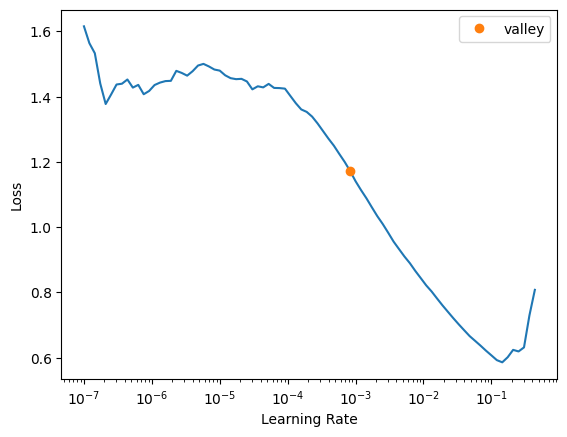

In [40]:
print("fining best learning rate..")
suggested_lrs_clean = cleaned_learner.lr_find()

In [41]:
cleaned_learner.fine_tune(4, base_lr= 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.049448,0.487553,0.170213,00:28


epoch,train_loss,valid_loss,error_rate,time
0,0.189743,0.562480,0.117021,00:54
1,0.149083,0.501365,0.085106,00:53
2,0.130062,0.234678,0.042553,00:53
3,0.098200,0.188653,0.042553,00:53


In [42]:
cleaned_intrep = ClassificationInterpretation.from_learner(cleaned_learner)

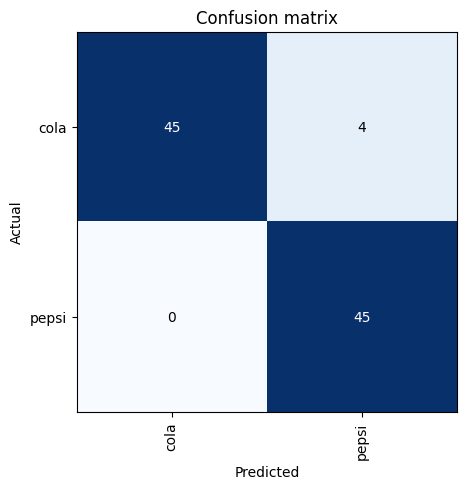

In [43]:
cleaned_intrep.plot_confusion_matrix()

# Use Freezing and Unfreezing Concept

### 1.Train the model head (in Freeze mode) for 3 periods
#### We use a relatively high learning rate because only the last layers are trained

In [ ]:
print("Step 1: Training the model head (Frozen)...")
cleaned_learner.fit_one_cycle(3, 1e-3)

Step 1: Training the model head (Frozen)...


epoch,train_loss,valid_loss,error_rate,time
0,0.035499,0.288479,0.063830,01:19
1,0.068277,6.364565,0.265957,01:19
2,0.055836,3.851666,0.244681,01:20


### 2.Unfreeze all layers of the model

In [ ]:
print("Unfreeze all layers...")
cleaned_learner.unfreeze()

Unfreeze all layers...


### 3. Find the new learning rate for the entire model
#### The graph for this step will be different from the previous graph

SuggestedLRs(valley=6.30957365501672e-05)

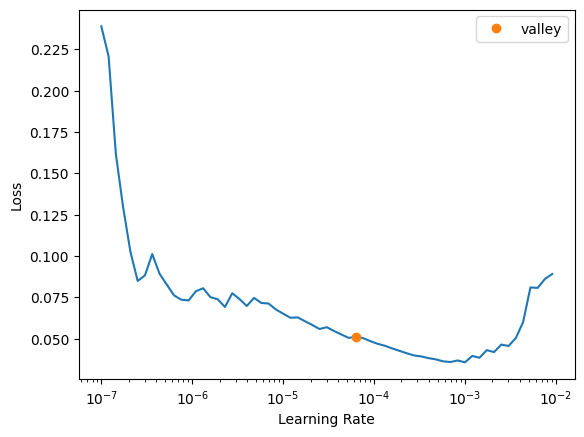

In [ ]:
cleaned_learner.lr_find()

### 4. Train the entire model with discrete learning rates

In [ ]:

print("Step 2: Train the entire model (Unfrozen)...")
cleaned_learner.fit_one_cycle(8, lr_max=slice(1e-6, 1e-4))

Step 2: Train the entire model (Unfrozen)...


NameError: name 'cleaned_learner' is not defined

# Final evaluation on the Test Set

In [ ]:
# 1. Specify the path to your test folder
# (make sure the folder name is correct, e.g. test_images or test)
path_to_test_images = path/'test_images'

# 2. Create a test dataloader. The tags are read from the file name.
test_files = get_image_files(path_to_test_images)
test_dl = dls.test_dl(test_files)

# 3. Evaluate the final model with the test data
# We don't use the model we saved, but the cleaned_learner one that is in memory
# Because we want to evaluate the same model
print("Evaluating model on Test Set...")
results = cleaned_learner.validate(dl=test_dl)

# We print the final results
# Index 1 is for loss and index 2 is for error_rate
print(f"Final Loss on Test Set: {results[0]:.4f}")
print(f"Final Error Rate on Test Set: {results[1]:.4f}")
print(f"Final Accuracy on Test Set: {1 - results[1]:.4f}")